In [106]:
# 필수 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [107]:
from sklearn.preprocessing import LabelEncoder

# 성능 지표 출력에 필요한 라이브러리리 import
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [108]:
full2_data = pd.read_csv('full_2_data.csv')
print(full2_data.info())
print(full2_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99186 entries, 0 to 99185
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99186 non-null  object 
 1   year          99186 non-null  int64  
 2   price         99186 non-null  int64  
 3   transmission  99186 non-null  object 
 4   mileage       99186 non-null  int64  
 5   fuelType      99186 non-null  object 
 6   tax           99186 non-null  float64
 7   mpg           99186 non-null  float64
 8   engineSize    99186 non-null  float64
 9   carMake       99186 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 7.6+ MB
None
          model  year  price transmission  mileage fuelType    tax   mpg  \
0       Octavia  2017  10550       Manual    25250   Petrol  150.0  54.3   
1        Citigo  2018   8200       Manual     1264   Petrol  145.0  67.3   
2       Octavia  2019  15650    Automatic     6825   Diesel  145.0  67.3   
3  Y

### 변수별 분포 확인

In [109]:
full2_num_df = full2_data.loc[:, ['year', 'price','mileage', 'tax', 'mpg', 'engineSize']]

print(full2_num_df.head())

   year  price  mileage    tax   mpg  engineSize
0  2017  10550    25250  150.0  54.3         1.4
1  2018   8200     1264  145.0  67.3         1.0
2  2019  15650     6825  145.0  67.3         2.0
3  2015  14000    28431  165.0  51.4         2.0
4  2019  18350    10912  150.0  40.9         1.5


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2884\1895710880.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, fit=norm)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2884\1895710880.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, fit=norm)
C:\Users\Public\Do

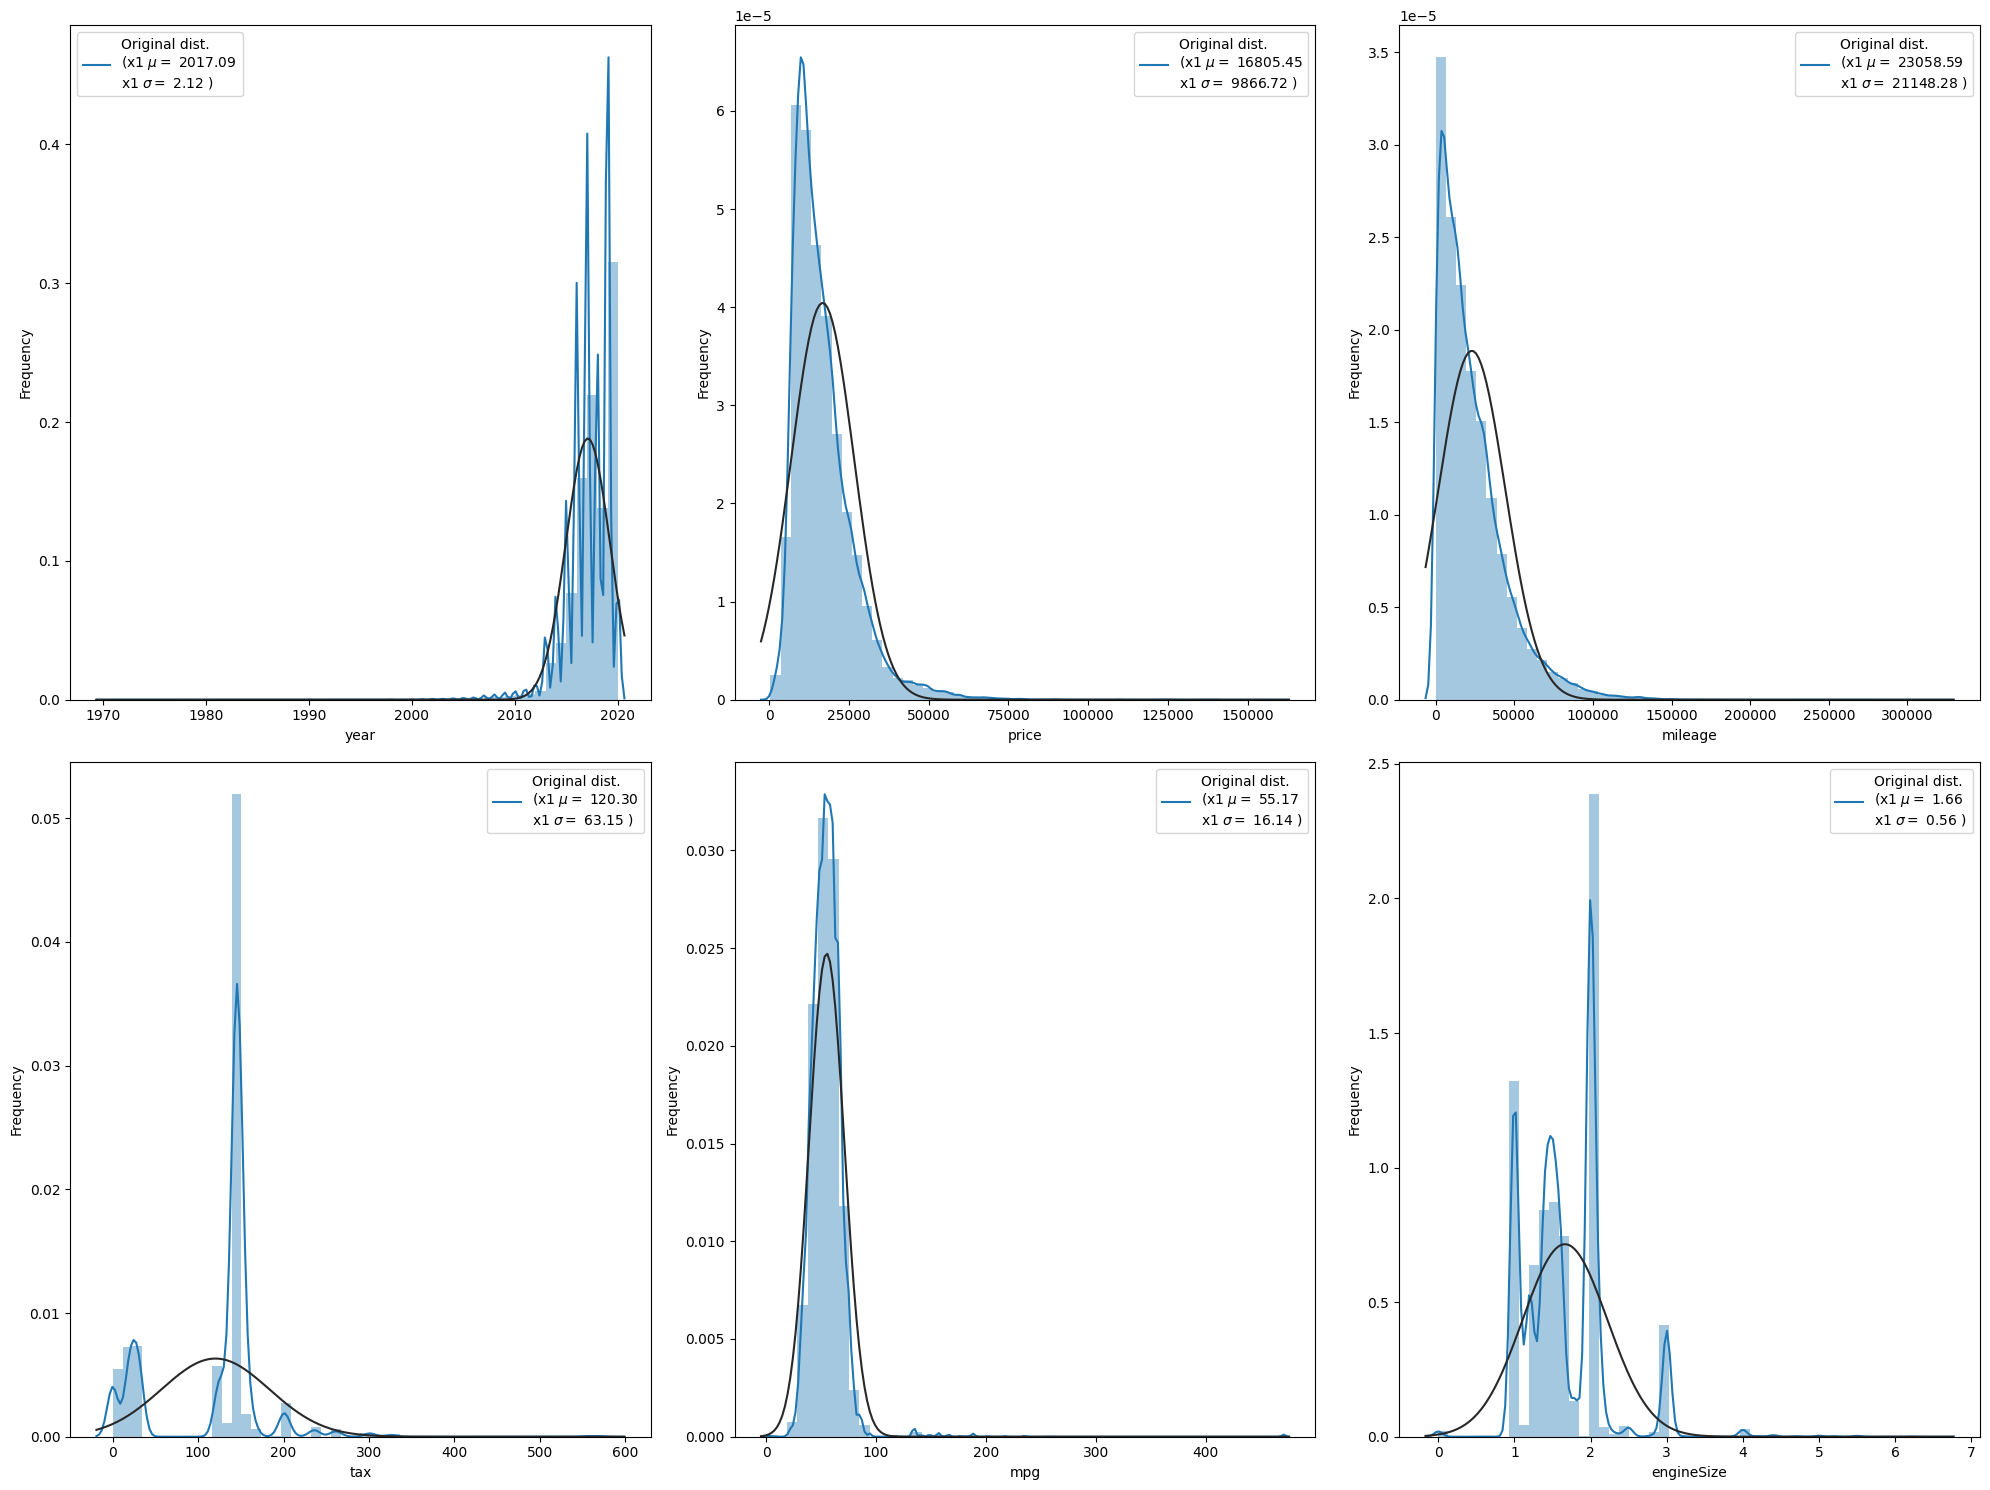

In [110]:
from scipy import stats
from scipy.stats import norm, skew

figure = plt.figure(figsize=(20,15))
rows, cols = 2, 3

for i in range(1, 7): 
    ax = figure.add_subplot(rows, cols, i)
    
    if i <= len(full2_num_df):
        full2_column = full2_num_df.columns[i-1]
        x1 = full2_num_df[full2_column]
        
        sns.distplot(x1, fit=norm)
        (x1_mu, x1_sigma) = norm.fit(x1)
                
        ax.legend([f'Original dist.\n(x1 $\mu=$ {x1_mu:.2f}\nx1 $\sigma=$ {x1_sigma:.2f} )'], loc='best')
        
        plt.xlabel(f'{full2_column}')
        plt.ylabel('Frequency')

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

### 결과 출력 함수

In [111]:
# 스케일링별 결과 출력

def traintest(x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    print(X_train.shape, X_test.shape)
    print(y_train.shape, y_test.shape)

    return (X_train, X_test, y_train, y_test)

In [112]:
results_regression2 = {}
    
def lgbm_model(x1, x2, y1, y2, z):
    
    X_train = x1
    X_test = x2
    y_train = y1
    y_test = y2
    
    # LGBMRegressor 모델 선언 후 Fitting
    lgb_model = LGBMRegressor() # all hyper-parameter : default
    lgb_model.fit(X_train, y_train)
    
    # Fitting된 모델로 x_valid를 통해 예측을 진행
    y_pred = lgb_model.predict(X_test)

    mse = round(mean_squared_error(y_test, y_pred), 3)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

    mae = round(mean_absolute_error(y_test, y_pred), 3)
    mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 3)

    r2 = round(r2_score(y_test, y_pred), 3)
    accuracy = round(lgb_model.score(X_test, y_test), 3)

    # 결과 출력
    print(f"\nLGBM {z} Results\n")
    print(f"평균 제곱 오차(MSE): {mse}")
    print(f"평균 제곱근 오차(RMSE): {rmse}" )
    print(f"평균 절대 오차(MAE): {mae}")
    print(f"평균 절대비율 오차(MAPE): {mape}%")
    print(f"결정 계수(R2): {r2}")
    print(f"정확도: {accuracy}")

    # 결과 저장
    results_regression2[f"LightGBM {z} Regression"] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "MAPE":mape, "R2": r2, "ACCURACY": accuracy}

In [113]:
results_regression = {}

def results_reg(x, y, z):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    print(X_train.shape, X_test.shape)
    print(y_train.shape, y_test.shape)
    
    # LGBMRegressor 모델 선언 후 Fitting
    lgb_model = LGBMRegressor() # all hyper-parameter : default
    lgb_model.fit(X_train, y_train)
    
    # Fitting된 모델로 x_valid를 통해 예측을 진행
    y_pred = lgb_model.predict(X_test)

    mse = round(mean_squared_error(y_test, y_pred), 3)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

    mae = round(mean_absolute_error(y_test, y_pred), 3)
    mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 3)

    r2 = round(r2_score(y_test, y_pred), 3)
    accuracy = round(lgb_model.score(X_test, y_test), 3)

    # 결과 출력
    print(f"\nLGBM {z} Results\n")
    print(f"평균 제곱 오차(MSE): {mse}")
    print(f"평균 제곱근 오차(RMSE): {rmse}" )
    print(f"평균 절대 오차(MAE): {mae}")
    print(f"평균 절대비율 오차(MAPE): {mape}%")
    print(f"결정 계수(R2): {r2}")
    print(f"정확도: {accuracy}")

    # 결과 저장
    results_regression[f"LightGBM {z} Regression"] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "MAPE":mape, "R2": r2, "ACCURACY": accuracy}

### 베이스 모델

In [114]:
# 라벨 인코딩
encoding_df = full2_data.copy(deep=True)

LE = LabelEncoder()
encoding_df['model'] = LE.fit_transform(encoding_df['model'])

# 원 핫 인코딩
encoding_df = pd.get_dummies(encoding_df)
print(len(encoding_df.columns))
encoding_df

25


,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,2017,10550,25250,150.0,54.3,1.4,False,True,False,...,True,False,False,False,False,False,True,False,False,False
1,53,2018,8200,1264,145.0,67.3,1.0,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,116,2019,15650,6825,145.0,67.3,2.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,188,2015,14000,28431,165.0,51.4,2.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,154,2019,18350,10912,150.0,40.9,1.5,False,True,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,64,2016,7999,31348,125.0,54.3,1.2,False,True,False,...,True,False,False,True,False,False,False,False,False,False
99182,34,2017,8999,16700,150.0,47.1,1.4,False,True,False,...,True,False,False,True,False,False,False,False,False,False
99183,34,2014,7499,40700,30.0,57.7,1.0,False,True,False,...,True,False,False,True,False,False,False,False,False,False
99184,65,2015,9999,7010,20.0,67.3,1.6,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [115]:
# 데이터셋 준비(X,y)
x_base = encoding_df.drop(columns='price')
y_base = encoding_df['price']

In [116]:
xtr_lgb, xt_lgb, ytr_lgb, yt_lgb = traintest(x_base, y_base)
lgbm_model(xtr_lgb, xt_lgb, ytr_lgb, yt_lgb, "Base")

(69430, 24) (29756, 24)
(69430,) (29756,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 16801.196169

LGBM Base Results

평균 제곱 오차(MSE): 5884412.541
평균 제곱근 오차(RMSE): 2425.781
평균 절대 오차(MAE): 1453.819
평균 절대비율 오차(MAPE): 9.303%
결정 계수(R2): 0.941
정확도: 0.941


##### 함수 미적용

In [117]:
# 데이터셋 분할
X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(x_base, y_base, test_size=0.3, random_state=42)
print(X_train_lgb.shape, X_test_lgb.shape)
print(y_train_lgb.shape, y_test_lgb.shape)

(69430, 24) (29756, 24)
(69430,) (29756,)


In [118]:
# LGBMRegressor 모델 선언 후 Fitting
lgb_model = LGBMRegressor() # all hyper-parameter : default
lgb_model.fit(X_train_lgb, y_train_lgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 16801.196169


LGBMRegressor()

In [119]:
# MAPE 계산 함수 정의
# def mean_absolute_percentage_error(y_true, y_pred):
#    y_true, y_pred = np.array(y_true), np.array(y_pred)
#    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [120]:
# 모델 성능 지표 출력 함수 만들기
results = {}

# Fitting된 모델로 x_valid를 통해 예측을 진행
y_pred_lgb = lgb_model.predict(X_test_lgb)

mse_lgb = round(mean_squared_error(y_test_lgb, y_pred_lgb), 3)
rmse_lgb = round(np.sqrt(mean_squared_error(y_test_lgb, y_pred_lgb)), 3)

mae_lgb = round(mean_absolute_error(y_test_lgb, y_pred_lgb), 3)
mape_lgb = round(mean_absolute_percentage_error(y_test_lgb, y_pred_lgb)*100, 3)

r2_lgb = round(r2_score(y_test_lgb, y_pred_lgb), 3)
accuracy_lgb = round(lgb_model.score(X_test_lgb, y_test_lgb), 3)

# 결과 출력
print("\nLGBM Results\n")
print(f"평균 제곱 오차(MSE): {mse_lgb}")
print(f"평균 제곱근 오차(RMSE): {rmse_lgb}" )
print(f"평균 절대 오차(MAE): {mae_lgb}")
print(f"평균 절대비율 오차(MAPE): {mape_lgb}%")
print(f"결정 계수(R2): {r2_lgb}")
print(f"정확도: {accuracy_lgb}")

# 결과 저장
results["LightGBM Regression"] = {"MSE": mse_lgb, "RMSE": rmse_lgb, "MAE": mae_lgb, "MAPE":mape_lgb, "R2": r2_lgb, "ACCURACY": accuracy_lgb}


LGBM Results

평균 제곱 오차(MSE): 5884412.541
평균 제곱근 오차(RMSE): 2425.781
평균 절대 오차(MAE): 1453.819
평균 절대비율 오차(MAPE): 9.303%
결정 계수(R2): 0.941
정확도: 0.941


In [121]:
# 모델별 성능 비교
results_df = pd.DataFrame(results).transpose()

# 긴 문자열이 잘리지 않도록 설정
pd.set_option('display.max_colwidth', None)
display(results_df)

,ACCURACY,MAE,MAPE,MSE,R2,RMSE
LightGBM Regression,0.941,1453.819,9.303,5884412.541,0.941,2425.781


### 로그 변환

In [122]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = full2_data.select_dtypes(include=numerics)
print(num_df.head(3))

   year  price  mileage    tax   mpg  engineSize
0  2017  10550    25250  150.0  54.3         1.4
1  2018   8200     1264  145.0  67.3         1.0
2  2019  15650     6825  145.0  67.3         2.0


#### 로그 변환용 인코딩

In [123]:
# 라벨 인코딩
log_df = full2_data.copy(deep=True)

LE = LabelEncoder()
log_df['model'] = LE.fit_transform(log_df['model'])

# 원 핫 인코딩
log_df = pd.get_dummies(log_df, dtype=int)
print(len(log_df.columns))
log_df

25


,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,2017,10550,25250,150.0,54.3,1.4,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,53,2018,8200,1264,145.0,67.3,1.0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,116,2019,15650,6825,145.0,67.3,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,188,2015,14000,28431,165.0,51.4,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,154,2019,18350,10912,150.0,40.9,1.5,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,64,2016,7999,31348,125.0,54.3,1.2,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99182,34,2017,8999,16700,150.0,47.1,1.4,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99183,34,2014,7499,40700,30.0,57.7,1.0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99184,65,2015,9999,7010,20.0,67.3,1.6,0,1,0,...,0,0,0,1,0,0,0,0,0,0


#### price 컬럼 변환

In [124]:
log_df['price'] = np.log1p(log_df['price'])
log_df

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,2017,9.263976,25250,150.0,54.3,1.4,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,53,2018,9.012011,1264,145.0,67.3,1.0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,116,2019,9.658290,6825,145.0,67.3,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,188,2015,9.546884,28431,165.0,51.4,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,154,2019,9.817439,10912,150.0,40.9,1.5,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,64,2016,8.987197,31348,125.0,54.3,1.2,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99182,34,2017,9.104980,16700,150.0,47.1,1.4,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99183,34,2014,8.922658,40700,30.0,57.7,1.0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99184,65,2015,9.210340,7010,20.0,67.3,1.6,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [125]:
# 데이터셋 준비(X,y)
X_logp = log_df.drop(columns='price')
y_logp = log_df['price']

In [126]:
xtr_logp, xt_logp, ytr_logp, yt_logp = traintest(X_logp, y_logp)
lgbm_model(xtr_logp, xt_logp, ytr_logp, yt_logp, "Log_Price")

(69430, 24) (29756, 24)
(69430,) (29756,)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 9.586980

LGBM Log_Price Results

평균 제곱 오차(MSE): 0.014
평균 제곱근 오차(RMSE): 0.119
평균 절대 오차(MAE): 0.086
평균 절대비율 오차(MAPE): 0.906%
결정 계수(R2): 0.951
정확도: 0.951


#### price & 연속형 컬럼 변환

In [127]:
log_df.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,2017,9.263976,25250,150.0,54.3,1.4,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,53,2018,9.012011,1264,145.0,67.3,1.0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,116,2019,9.658290,6825,145.0,67.3,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,188,2015,9.546884,28431,165.0,51.4,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,154,2019,9.817439,10912,150.0,40.9,1.5,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [128]:
log_df[['mileage', 'tax', 'mpg', 'engineSize']] = np.log1p(log_df[['mileage', 'tax', 'mpg', 'engineSize']])
log_df

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,2017,9.263976,10.136621,5.017280,4.012773,0.875469,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,53,2018,9.012011,7.142827,4.983607,4.223910,0.693147,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,116,2019,9.658290,8.828494,4.983607,4.223910,1.098612,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,188,2015,9.546884,10.255271,5.111988,3.958907,1.098612,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,154,2019,9.817439,9.297710,5.017280,3.735286,0.916291,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,64,2016,8.987197,10.352938,4.836282,4.012773,0.788457,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99182,34,2017,9.104980,9.723224,5.017280,3.873282,0.875469,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99183,34,2014,8.922658,10.614008,3.433987,4.072440,0.693147,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99184,65,2015,9.210340,8.855236,3.044522,4.223910,0.955511,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [129]:
# 데이터셋 준비(X,y)
X_logpn = log_df.drop(columns='price')
y_logpn = log_df['price']

In [130]:
xtr_logpn, xt_logpn, ytr_logpn, yt_logpn = traintest(X_logpn, y_logpn)
lgbm_model(xtr_logpn, xt_logpn, ytr_logpn, yt_logpn, "Log_Price_Nums")

(69430, 24) (29756, 24)
(69430,) (29756,)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 9.586980

LGBM Log_Price_Nums Results

평균 제곱 오차(MSE): 0.014
평균 제곱근 오차(RMSE): 0.119
평균 절대 오차(MAE): 0.086
평균 절대비율 오차(MAPE): 0.906%
결정 계수(R2): 0.951
정확도: 0.951


#### price & 연속형 & 이산형 컬럼 변환

In [131]:
log_df['year'] = np.log1p(log_df['year'])
log_df

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,7.609862,9.263976,10.136621,5.017280,4.012773,0.875469,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,53,7.610358,9.012011,7.142827,4.983607,4.223910,0.693147,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,116,7.610853,9.658290,8.828494,4.983607,4.223910,1.098612,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,188,7.608871,9.546884,10.255271,5.111988,3.958907,1.098612,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,154,7.610853,9.817439,9.297710,5.017280,3.735286,0.916291,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99181,64,7.609367,8.987197,10.352938,4.836282,4.012773,0.788457,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99182,34,7.609862,9.104980,9.723224,5.017280,3.873282,0.875469,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99183,34,7.608374,8.922658,10.614008,3.433987,4.072440,0.693147,0,1,0,...,1,0,0,1,0,0,0,0,0,0
99184,65,7.608871,9.210340,8.855236,3.044522,4.223910,0.955511,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [132]:
# 데이터셋 준비(X,y)
X_logpa = log_df.drop(columns='price')
y_logpa = log_df['price']

In [167]:
xtr_logpa, xt_logpa, ytr_logpa, yt_logpa = traintest(X_logpa, y_logpa)
lgbm_model(xtr_logpa, xt_logpa, ytr_logpa, yt_logpa, "Log_Price_All")

(69430, 24) (29756, 24)
(69430,) (29756,)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 9.586980

LGBM Log_Price_All Results

평균 제곱 오차(MSE): 0.014
평균 제곱근 오차(RMSE): 0.119
평균 절대 오차(MAE): 0.086
평균 절대비율 오차(MAPE): 0.906%
결정 계수(R2): 0.951
정확도: 0.951


In [168]:
for key in results_regression2['LightGBM Log_Price_All Regression'].keys():
    results_regression2['LightGBM Log_Price_All Regression'][key] = round(np.expm1(results_regression2['LightGBM Log_Price_All Regression'][key]), 3)

results_regression2['LightGBM Log_Price_All Regression']

{'MSE': 0.014,
 'RMSE': 0.126,
 'MAE': 0.09,
 'MAPE': 1.474,
 'R2': 1.588,
 'ACCURACY': 1.588}

#### 로그 변환 변수 분포도

In [134]:
log_num_df = log_df.loc[:, ['year', 'price','mileage', 'tax', 'mpg', 'engineSize']]

print(log_num_df.head())

       year     price    mileage       tax       mpg  engineSize
0  7.609862  9.263976  10.136621  5.017280  4.012773    0.875469
1  7.610358  9.012011   7.142827  4.983607  4.223910    0.693147
2  7.610853  9.658290   8.828494  4.983607  4.223910    1.098612
3  7.608871  9.546884  10.255271  5.111988  3.958907    1.098612
4  7.610853  9.817439   9.297710  5.017280  3.735286    0.916291


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2884\835705054.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, fit=norm)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2884\835705054.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, fit=norm)
C:\Users\Public\Docu

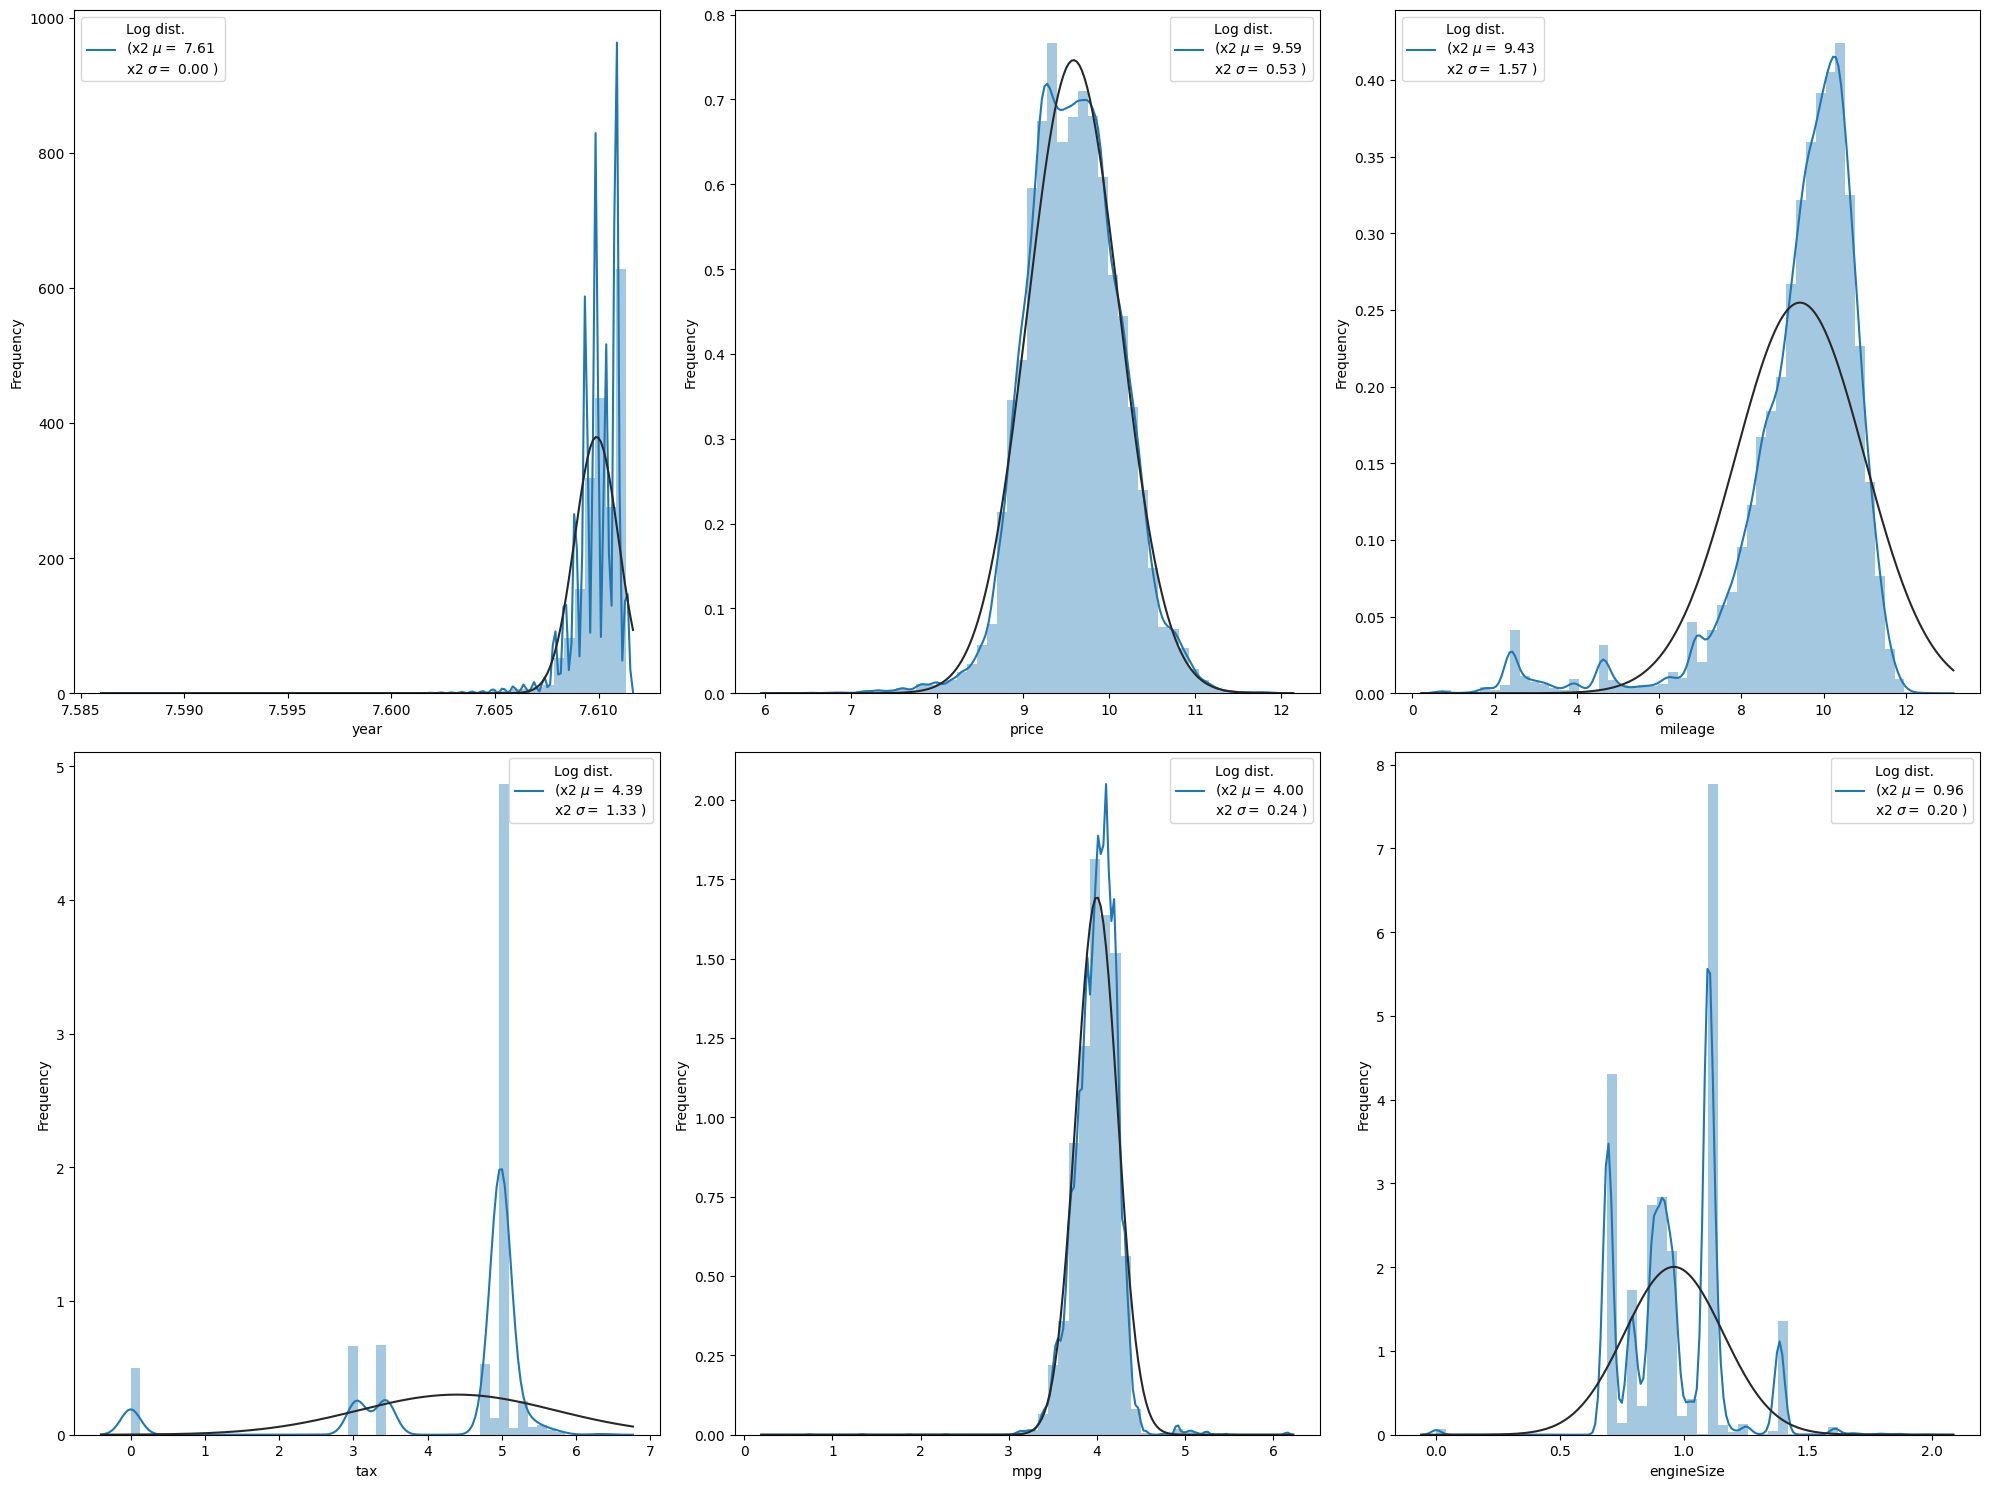

In [135]:
from scipy import stats
from scipy.stats import norm, skew

figure = plt.figure(figsize=(20,15))
rows, cols = 2, 3
        
for i in range(1, 7): 
    ax = figure.add_subplot(rows, cols, i)
    
    if i <= len(log_num_df):
        log_column = log_num_df.columns[i-1]
        x2 = log_num_df[log_column]
            
        sns.distplot(x2, fit=norm)
        (x2_mu, x2_sigma) = norm.fit(x2)
        
        ax.legend([f'Log dist.\n(x2 $\mu=$ {x2_mu:.2f}\nx2 $\sigma=$ {x2_sigma:.2f} )'], loc='best')
        
        plt.xlabel(f'{log_column}')
        plt.ylabel('Frequency')

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

#### 독립변수만 로그 변환

In [136]:
log2_df = encoding_df.copy(deep=True)
log2_df.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,2017,10550,25250,150.0,54.3,1.4,False,True,False,...,True,False,False,False,False,False,True,False,False,False
1,53,2018,8200,1264,145.0,67.3,1.0,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,116,2019,15650,6825,145.0,67.3,2.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,188,2015,14000,28431,165.0,51.4,2.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,154,2019,18350,10912,150.0,40.9,1.5,False,True,False,...,True,False,False,False,False,False,True,False,False,False


In [137]:
log2_df[['year', 'mileage', 'tax', 'mpg', 'engineSize']] = np.log1p(log2_df[['year', 'mileage', 'tax', 'mpg', 'engineSize']])
log2_df.head()

,model,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,...,fuelType_Petrol,carMake_audi,carMake_bmw,carMake_ford,carMake_hyundai,carMake_merc,carMake_skoda,carMake_toyota,carMake_vauxhall,carMake_vw
0,116,7.609862,10550,10.136621,5.017280,4.012773,0.875469,False,True,False,...,True,False,False,False,False,False,True,False,False,False
1,53,7.610358,8200,7.142827,4.983607,4.223910,0.693147,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,116,7.610853,15650,8.828494,4.983607,4.223910,1.098612,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,188,7.608871,14000,10.255271,5.111988,3.958907,1.098612,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,154,7.610853,18350,9.297710,5.017280,3.735286,0.916291,False,True,False,...,True,False,False,False,False,False,True,False,False,False


In [138]:
# 데이터셋 준비(X,y)
X_loga = log2_df.drop(columns='price')
y_loga = log2_df['price']

In [139]:
xtr_loga, xt_loga, ytr_loga, yt_loga = traintest(X_loga, y_loga)
lgbm_model(xtr_loga, xt_loga, ytr_loga, yt_loga, "Log_All")

(69430, 24) (29756, 24)
(69430,) (29756,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 16801.196169

LGBM Log_All Results

평균 제곱 오차(MSE): 5884412.738
평균 제곱근 오차(RMSE): 2425.781
평균 절대 오차(MAE): 1453.821
평균 절대비율 오차(MAPE): 9.303%
결정 계수(R2): 0.941
정확도: 0.941


In [154]:
log2_num_df = log2_df.loc[:, ['year','mileage', 'tax', 'mpg', 'engineSize']]

print(log2_num_df.head())

       year    mileage       tax       mpg  engineSize
0  7.609862  10.136621  5.017280  4.012773    0.875469
1  7.610358   7.142827  4.983607  4.223910    0.693147
2  7.610853   8.828494  4.983607  4.223910    1.098612
3  7.608871  10.255271  5.111988  3.958907    1.098612
4  7.610853   9.297710  5.017280  3.735286    0.916291


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2884\4179438480.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, fit=norm)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2884\4179438480.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, fit=norm)
C:\Users\Public\Do

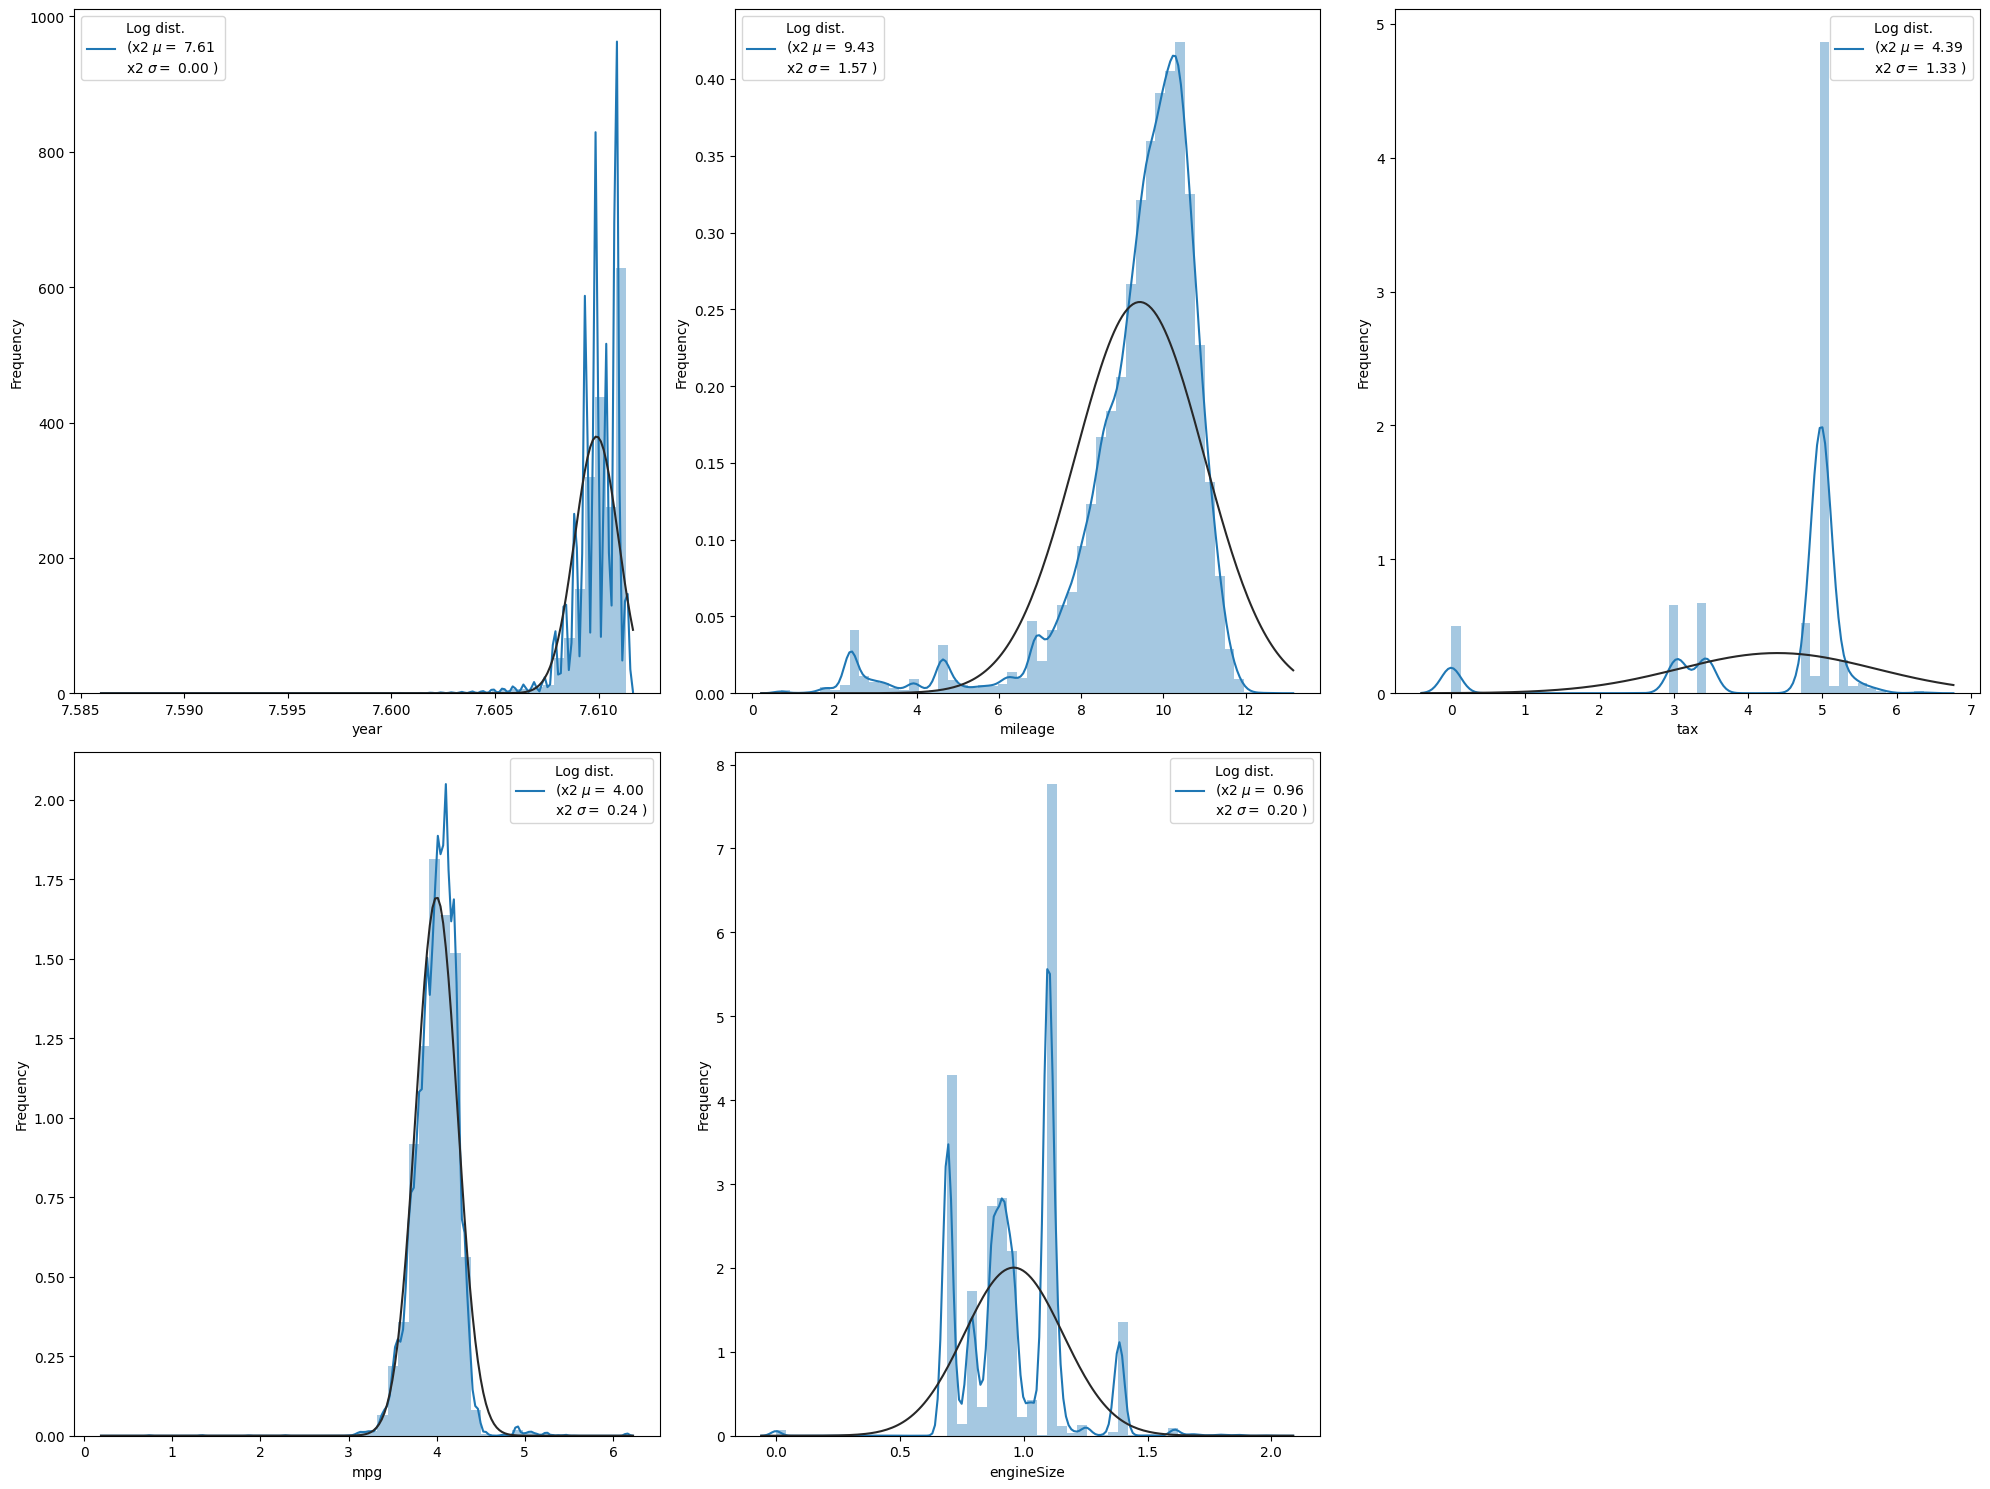

In [156]:
from scipy import stats
from scipy.stats import norm, skew

figure = plt.figure(figsize=(20,15))
rows, cols = 2, 3
        
for i in range(1, 6): 
    ax = figure.add_subplot(rows, cols, i)
    
    if i <= len(log2_num_df):
        log_column = log2_num_df.columns[i-1]
        x2 = log_num_df[log_column]
            
        sns.distplot(x2, fit=norm)
        (x2_mu, x2_sigma) = norm.fit(x2)
        
        ax.legend([f'Log dist.\n(x2 $\mu=$ {x2_mu:.2f}\nx2 $\sigma=$ {x2_sigma:.2f} )'], loc='best')
        
        plt.xlabel(f'{log_column}')
        plt.ylabel('Frequency')

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

### 표준화 스케일링

In [140]:
# 데이터셋 준비
stand_df = encoding_df.copy(deep=True)

X_stand = stand_df.drop(columns='price')
y_stand = stand_df['price']

xtr_stand, xt_stand, ytr_stand, yt_stand = train_test_split(X_stand, y_stand, test_size=0.3, random_state=42)
print(xtr_stand.shape, xt_stand.shape)
print(ytr_stand.shape, yt_stand.shape)

(69430, 24) (29756, 24)
(69430,) (29756,)


In [141]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()

num_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

scaler.fit(xtr_stand[num_columns])
xtr_stand[num_columns] = scaler.transform(xtr_stand[num_columns])

xt_stand[num_columns] = scaler.transform(xt_stand[num_columns])

In [142]:
lgbm_model(xtr_stand, xt_stand, ytr_stand, yt_stand, "Standard")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 16801.196169

LGBM Standard Results

평균 제곱 오차(MSE): 5980771.172
평균 제곱근 오차(RMSE): 2445.562
평균 절대 오차(MAE): 1459.079
평균 절대비율 오차(MAPE): 9.333%
결정 계수(R2): 0.94
정확도: 0.94


In [143]:
stand_num_df = xtr_stand.loc[:, ['year', 'mileage', 'tax', 'mpg', 'engineSize']]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2884\3734977304.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, fit=norm)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2884\3734977304.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, fit=norm)
C:\Users\Public\Do

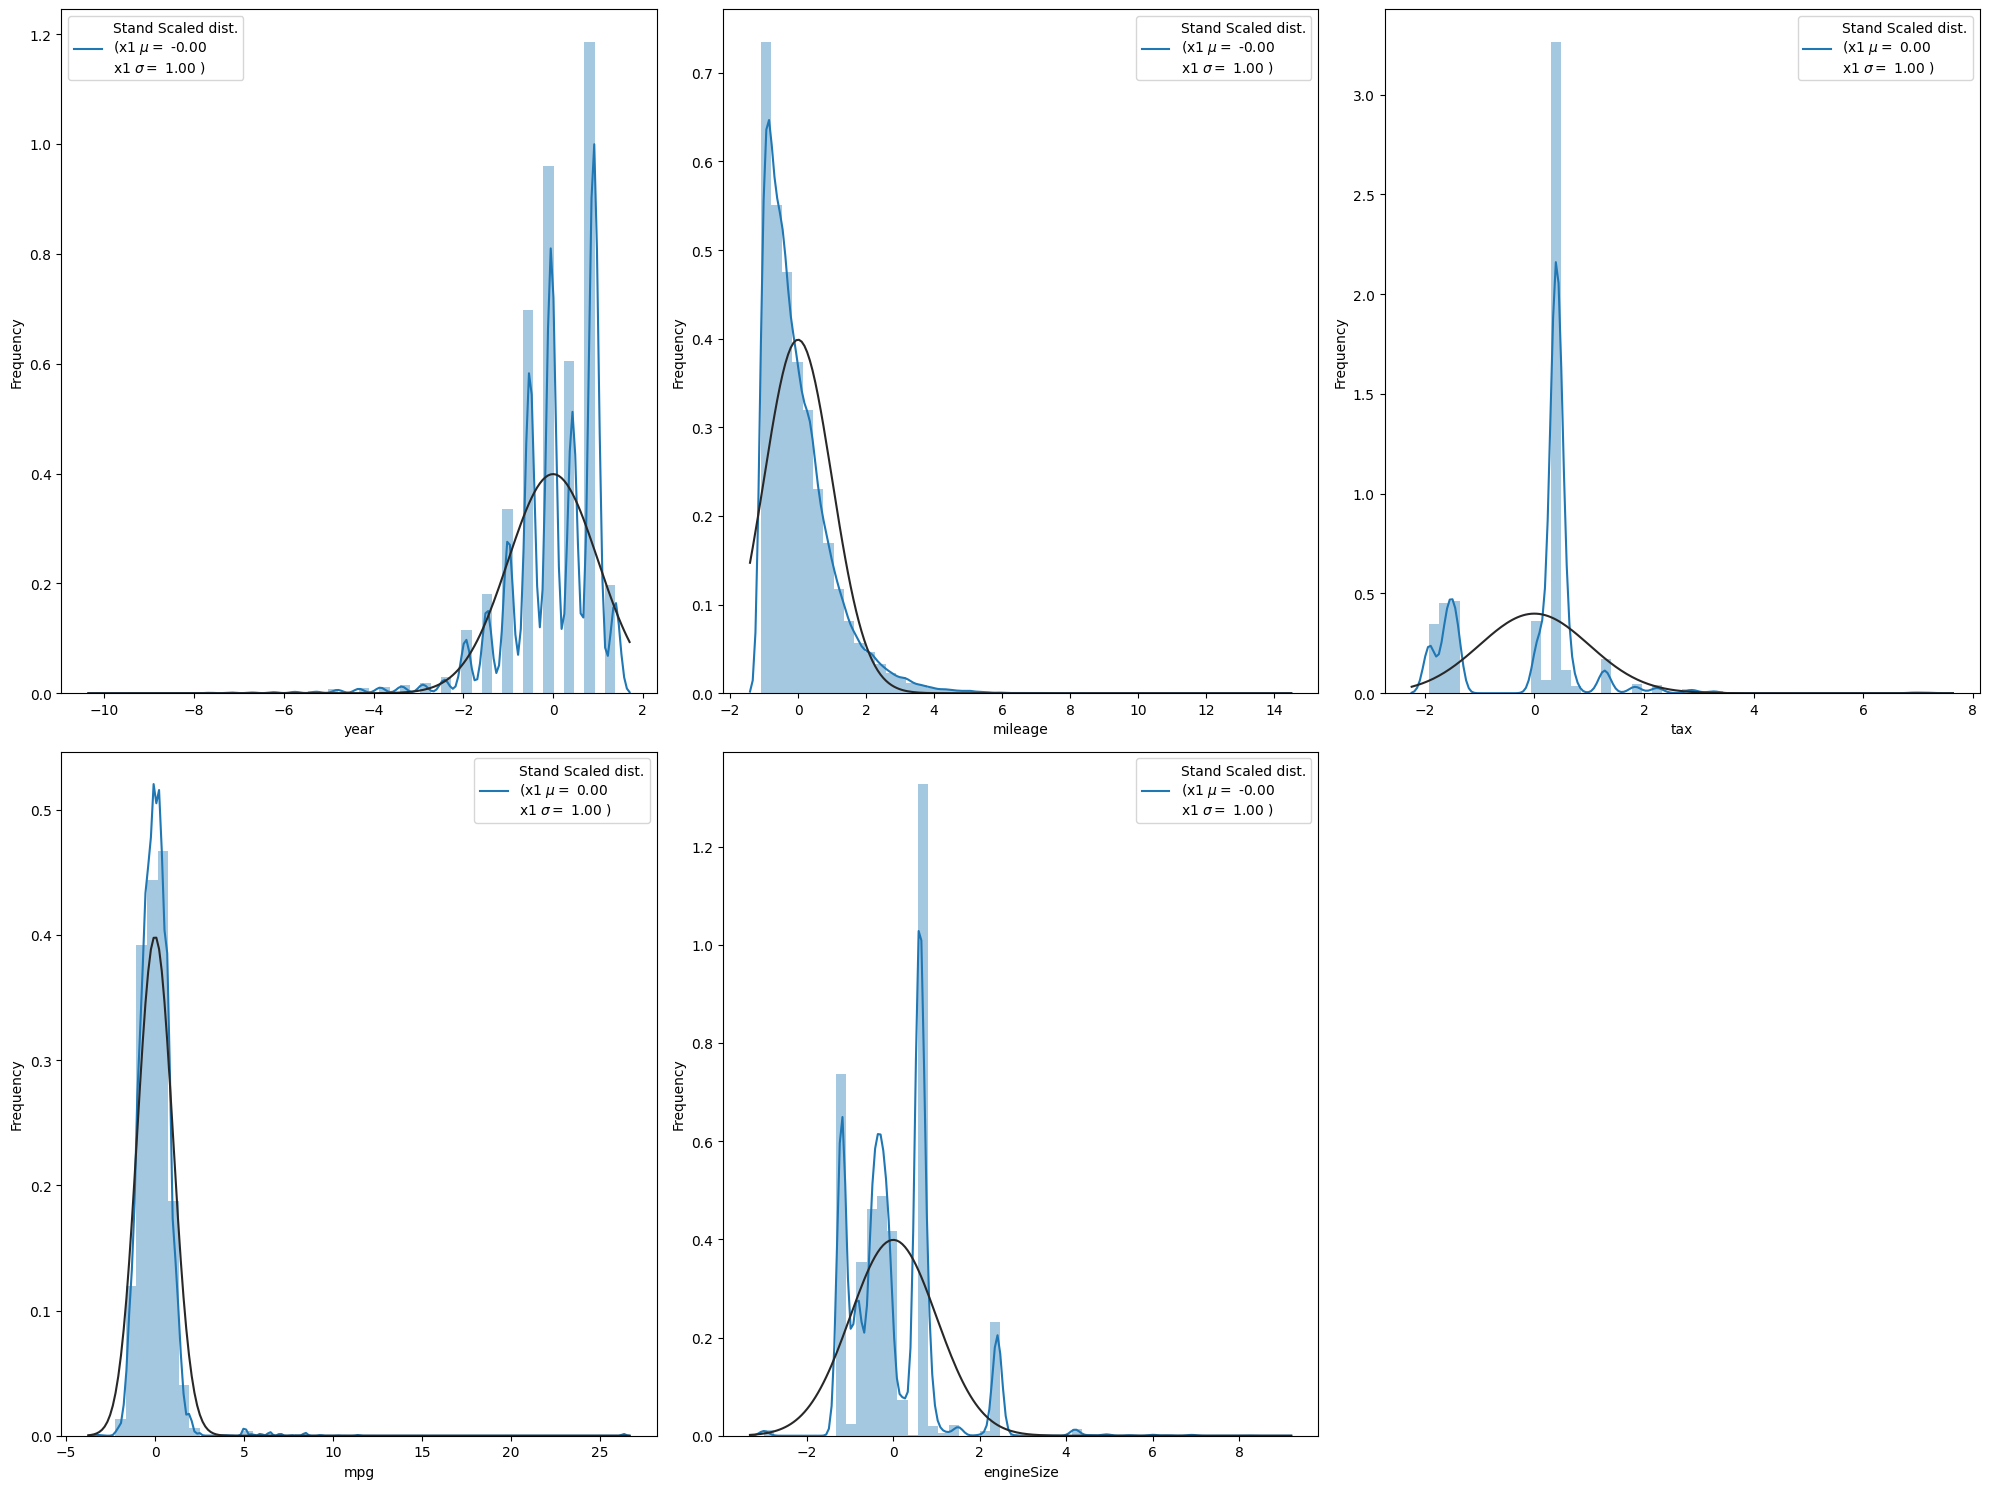

In [144]:
from scipy import stats
from scipy.stats import norm, skew

figure = plt.figure(figsize=(20,15))
rows, cols = 2, 3

for i in range(1, 6): 
    ax = figure.add_subplot(rows, cols, i)
    
    if i <= len(stand_num_df):
        stand_column = stand_num_df.columns[i-1]
        x1 = stand_num_df[stand_column]
        
        sns.distplot(x1, fit=norm)
        (x1_mu, x1_sigma) = norm.fit(x1)
                
        ax.legend([f'Stand Scaled dist.\n(x1 $\mu=$ {x1_mu:.2f}\nx1 $\sigma=$ {x1_sigma:.2f} )'], loc='best')
        
        plt.xlabel(f'{stand_column}')
        plt.ylabel('Frequency')

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

### 정규화 스케일링

In [145]:
# 데이터셋 준비
minmax_df = encoding_df.copy(deep=True)

X_minmax = minmax_df.drop(columns='price')
y_minmax = minmax_df['price']

xtr_minmax, xt_minmax, ytr_minmax, yt_minmax = train_test_split(X_minmax, y_minmax, test_size=0.3, random_state=42)
print(xtr_minmax.shape, xt_minmax.shape)
print(ytr_minmax.shape, yt_minmax.shape)

(69430, 24) (29756, 24)
(69430,) (29756,)


In [146]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()

num_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

scaler2.fit(xtr_minmax[num_columns])
xtr_minmax[num_columns] = scaler2.transform(xtr_minmax[num_columns])

xt_minmax[num_columns] = scaler2.transform(xt_minmax[num_columns])

In [147]:
lgbm_model(xtr_minmax, xt_minmax, ytr_minmax, yt_minmax, "Min_Max")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 69430, number of used features: 22
[LightGBM] [Info] Start training from score 16801.196169

LGBM Min_Max Results

평균 제곱 오차(MSE): 5884412.541
평균 제곱근 오차(RMSE): 2425.781
평균 절대 오차(MAE): 1453.819
평균 절대비율 오차(MAPE): 9.303%
결정 계수(R2): 0.941
정확도: 0.941


In [148]:
minmax_num_df = xtr_minmax.loc[:, ['year', 'mileage', 'tax', 'mpg', 'engineSize']]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2884\1964261174.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, fit=norm)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2884\1964261174.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, fit=norm)
C:\Users\Public\Do

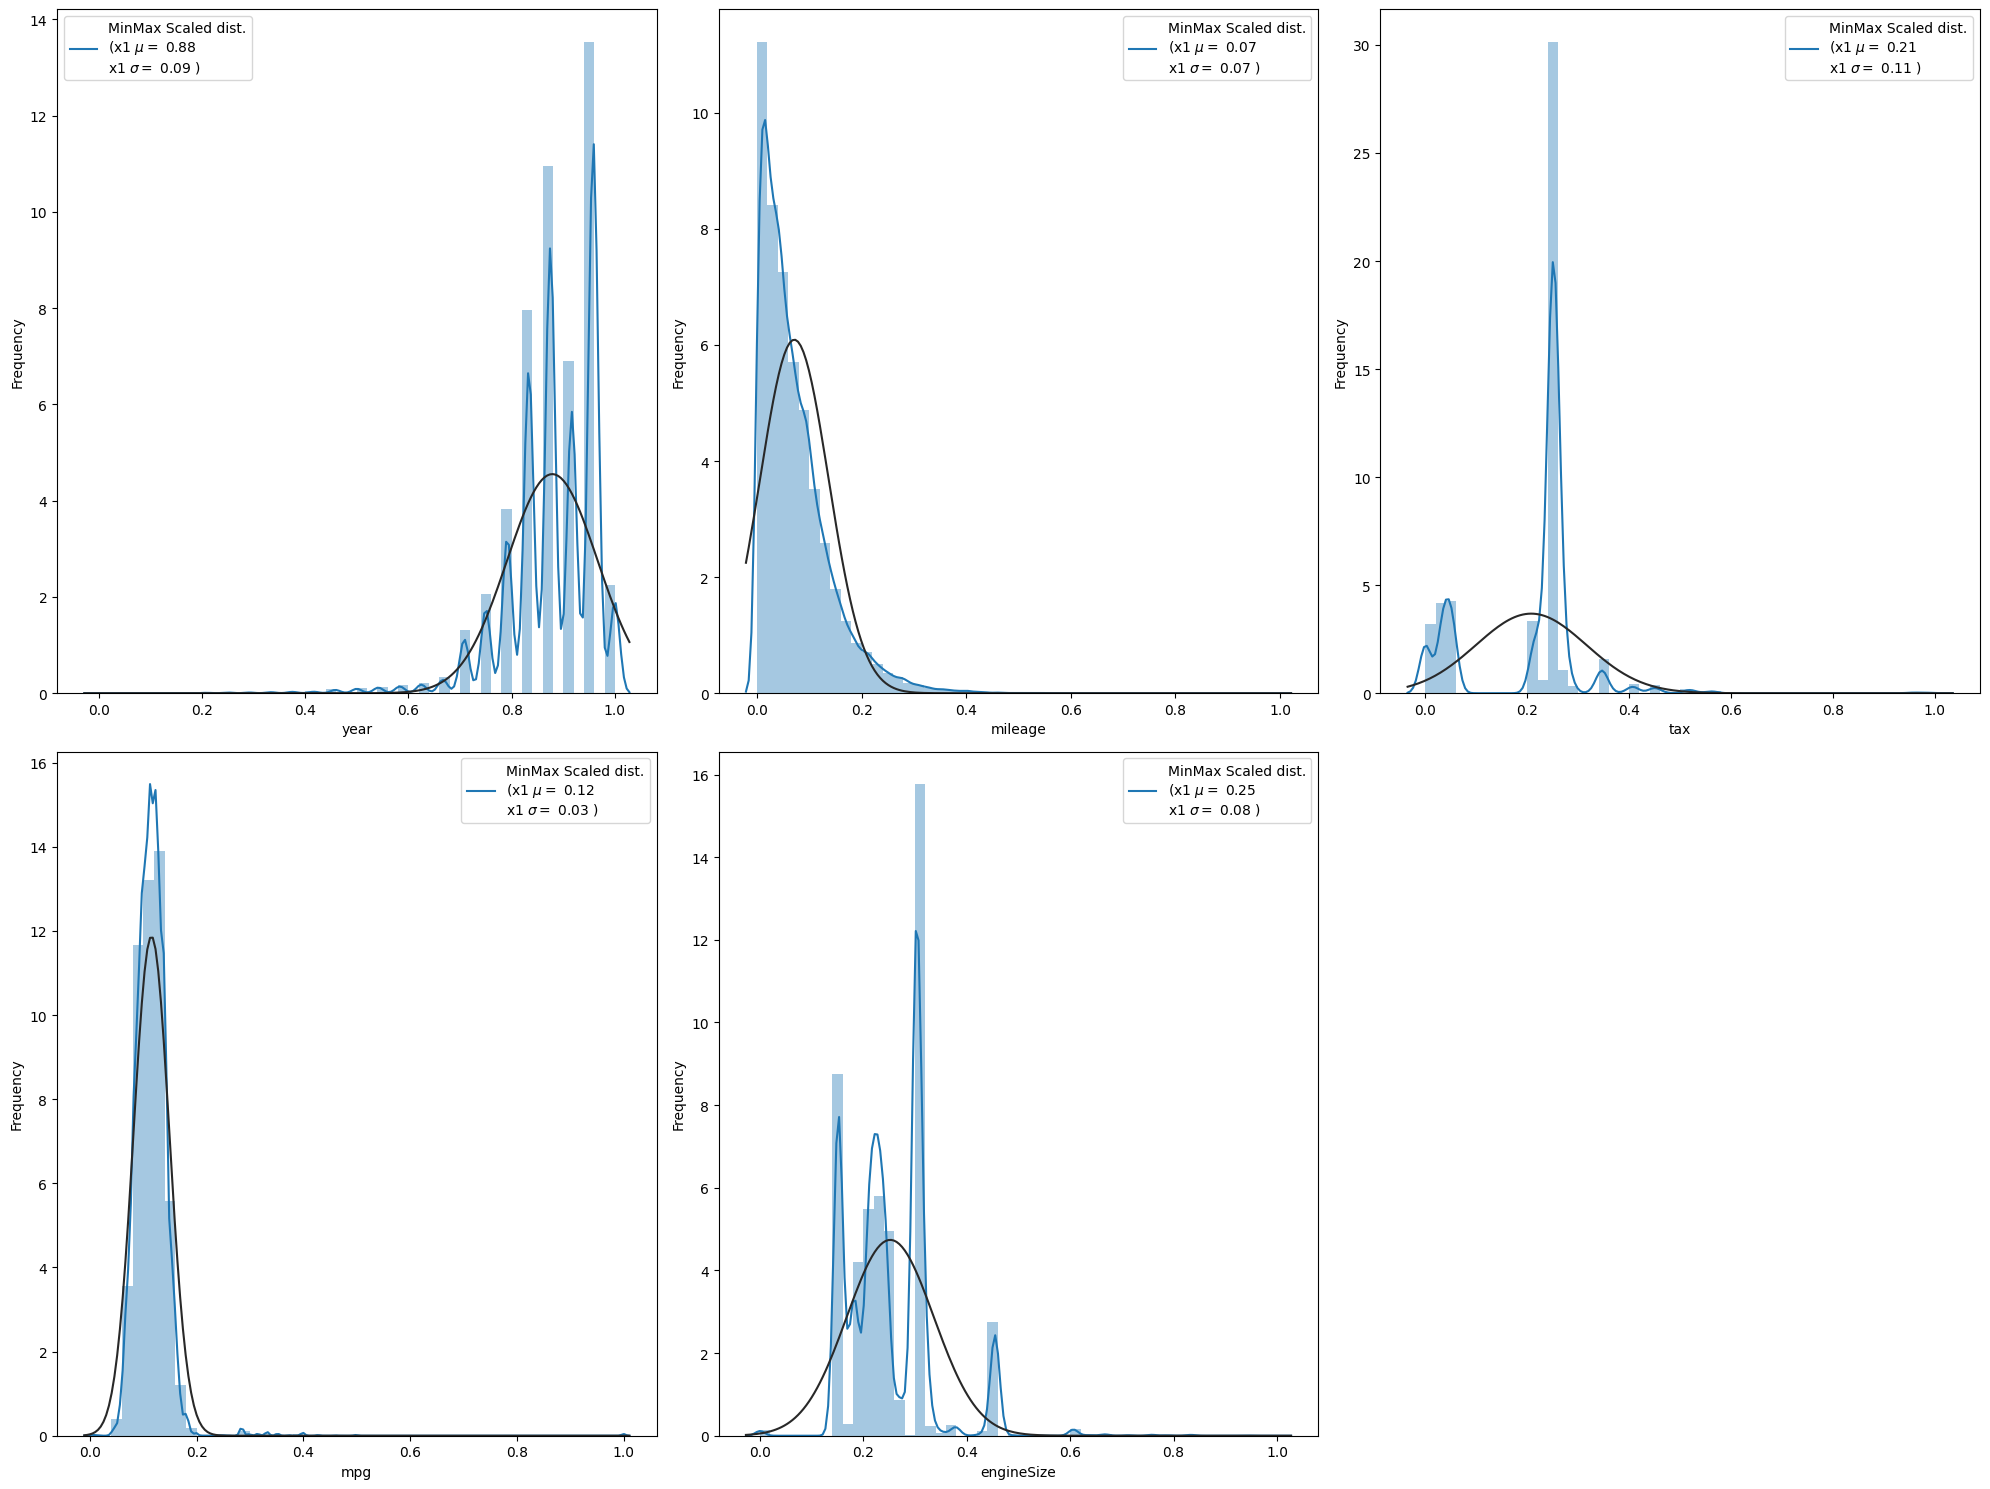

In [149]:
from scipy import stats
from scipy.stats import norm, skew

figure = plt.figure(figsize=(20,15))
rows, cols = 2, 3

for i in range(1, 6): 
    ax = figure.add_subplot(rows, cols, i)
    
    if i <= len(minmax_num_df):
        minmax_column = minmax_num_df.columns[i-1]
        x1 = minmax_num_df[minmax_column]
        
        sns.distplot(x1, fit=norm)
        (x1_mu, x1_sigma) = norm.fit(x1)
                
        ax.legend([f'MinMax Scaled dist.\n(x1 $\mu=$ {x1_mu:.2f}\nx1 $\sigma=$ {x1_sigma:.2f} )'], loc='best')
        
        plt.xlabel(f'{minmax_column}')
        plt.ylabel('Frequency')

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

### 스케일링별 성능 비교

In [150]:
results_regression2

{'LightGBM Base Regression': {'MSE': 5884412.541,
  'RMSE': 2425.781,
  'MAE': 1453.819,
  'MAPE': 9.303,
  'R2': 0.941,
  'ACCURACY': 0.941},
 'LightGBM Log_Price Regression': {'MSE': 0.014,
  'RMSE': 0.119,
  'MAE': 0.086,
  'MAPE': 0.906,
  'R2': 0.951,
  'ACCURACY': 0.951},
 'LightGBM Log_Price_Nums Regression': {'MSE': 0.014,
  'RMSE': 0.119,
  'MAE': 0.086,
  'MAPE': 0.906,
  'R2': 0.951,
  'ACCURACY': 0.951},
 'LightGBM Log_Price_All Regression': {'MSE': 0.014,
  'RMSE': 0.119,
  'MAE': 0.086,
  'MAPE': 0.906,
  'R2': 0.951,
  'ACCURACY': 0.951},
 'LightGBM Log_All Regression': {'MSE': 5884412.738,
  'RMSE': 2425.781,
  'MAE': 1453.821,
  'MAPE': 9.303,
  'R2': 0.941,
  'ACCURACY': 0.941},
 'LightGBM Standard Regression': {'MSE': 5980771.172,
  'RMSE': 2445.562,
  'MAE': 1459.079,
  'MAPE': 9.333,
  'R2': 0.94,
  'ACCURACY': 0.94},
 'LightGBM Min_Max Regression': {'MSE': 5884412.541,
  'RMSE': 2425.781,
  'MAE': 1453.819,
  'MAPE': 9.303,
  'R2': 0.941,
  'ACCURACY': 0.941}}

In [151]:
results_df = pd.DataFrame(results_regression2)
results_df

,LightGBM Base Regression,LightGBM Log_Price Regression,LightGBM Log_Price_Nums Regression,LightGBM Log_Price_All Regression,LightGBM Log_All Regression,LightGBM Standard Regression,LightGBM Min_Max Regression
MSE,5884412.541,0.014,0.014,0.014,5884412.738,5980771.172,5884412.541
RMSE,2425.781,0.119,0.119,0.119,2425.781,2445.562,2425.781
MAE,1453.819,0.086,0.086,0.086,1453.821,1459.079,1453.819
MAPE,9.303,0.906,0.906,0.906,9.303,9.333,9.303
R2,0.941,0.951,0.951,0.951,0.941,0.940,0.941
ACCURACY,0.941,0.951,0.951,0.951,0.941,0.940,0.941


#### 로그 변환 결과 값 지수 변환

In [170]:
results_mod = results_df.loc[:, ['LightGBM Log_Price Regression', 'LightGBM Log_Price_Nums Regression', 'LightGBM Log_Price_All Regression', 'LightGBM Log_All Regression']].copy(deep=True)
results_mod

,LightGBM Log_Price Regression,LightGBM Log_Price_Nums Regression,LightGBM Log_Price_All Regression,LightGBM Log_All Regression
MSE,0.014,0.014,0.014,5884412.738
RMSE,0.119,0.119,0.119,2425.781
MAE,0.086,0.086,0.086,1453.821
MAPE,0.906,0.906,0.906,9.303
R2,0.951,0.951,0.951,0.941
ACCURACY,0.951,0.951,0.951,0.941


In [178]:
results_mod['LightGBM Log_Price Regression'].keys()

Index(['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'ACCURACY'], dtype='object')

In [179]:
for df in results_mod.columns:
    for key in results_mod[df].keys():
        results_mod[df][key] = round(np.expm1(results_mod[df][key]), 3)

results_mod

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2884\1353492670.py:3: RuntimeWarning: overflow encountered in expm1
  results_mod[df][key] = round(np.expm1(results_mod[df][key]), 3)


,LightGBM Log_Price Regression,LightGBM Log_Price_Nums Regression,LightGBM Log_Price_All Regression,LightGBM Log_All Regression
MSE,0.014,0.014,0.014,inf
RMSE,0.126,0.126,0.126,inf
MAE,0.090,0.090,0.090,inf
MAPE,1.474,1.474,1.474,10969.883
R2,1.588,1.588,1.588,1.563
ACCURACY,1.588,1.588,1.588,1.563
